In [1]:
# 성별 (Gender) - 0 : 여자, 1 : 남자
# 근처 위치 (Near_Location) - 사용자가 체육관이 위치한 동네에서 살거나 일하는지 여부.
# 파트너 (Partner) - 사용자가 관련된 회사에서 일하는지 여부 (체육관은 제휴된 회사의 직원이 할인을 받을 수 있도록 정보를 저장합니다).
# 프로모 친구 (Promo_friends) - 사용자가 친구의 프로모션 코드를 사용하여 처음 가입했는지 여부.
# 전화번호 (Phone) - 사용자가 전화번호를 제공했는지 여부.
# 계약 기간 (Contract_period)
# 그룹 방문 여부 (Group_visits)
# 총 평균 추가 요금 (Avg_additional_charges_total)
# 계약 종료까지 남은 월 수 (Month_to_end_contract)
# 나이 (Age)
# 가입 기간 (Lifetime) - 사용자가 체육관에 처음 등록한 이후 경과한 시간(개월 단위).
# 총 평균 수업 빈도 (Avg_class_frequency_total)
# 현재 월 평균 수업 빈도 (Avg_class_frequency_current_month)
# 고객 이탈 (Churn)

### EDA

In [7]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data/gym_churn_us.csv')

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [11]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [12]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [13]:
# 중복 확인
df.duplicated().sum()

0

In [9]:
df.loc[:, "Contract_period"].unique()

array([ 6, 12,  1], dtype=int64)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

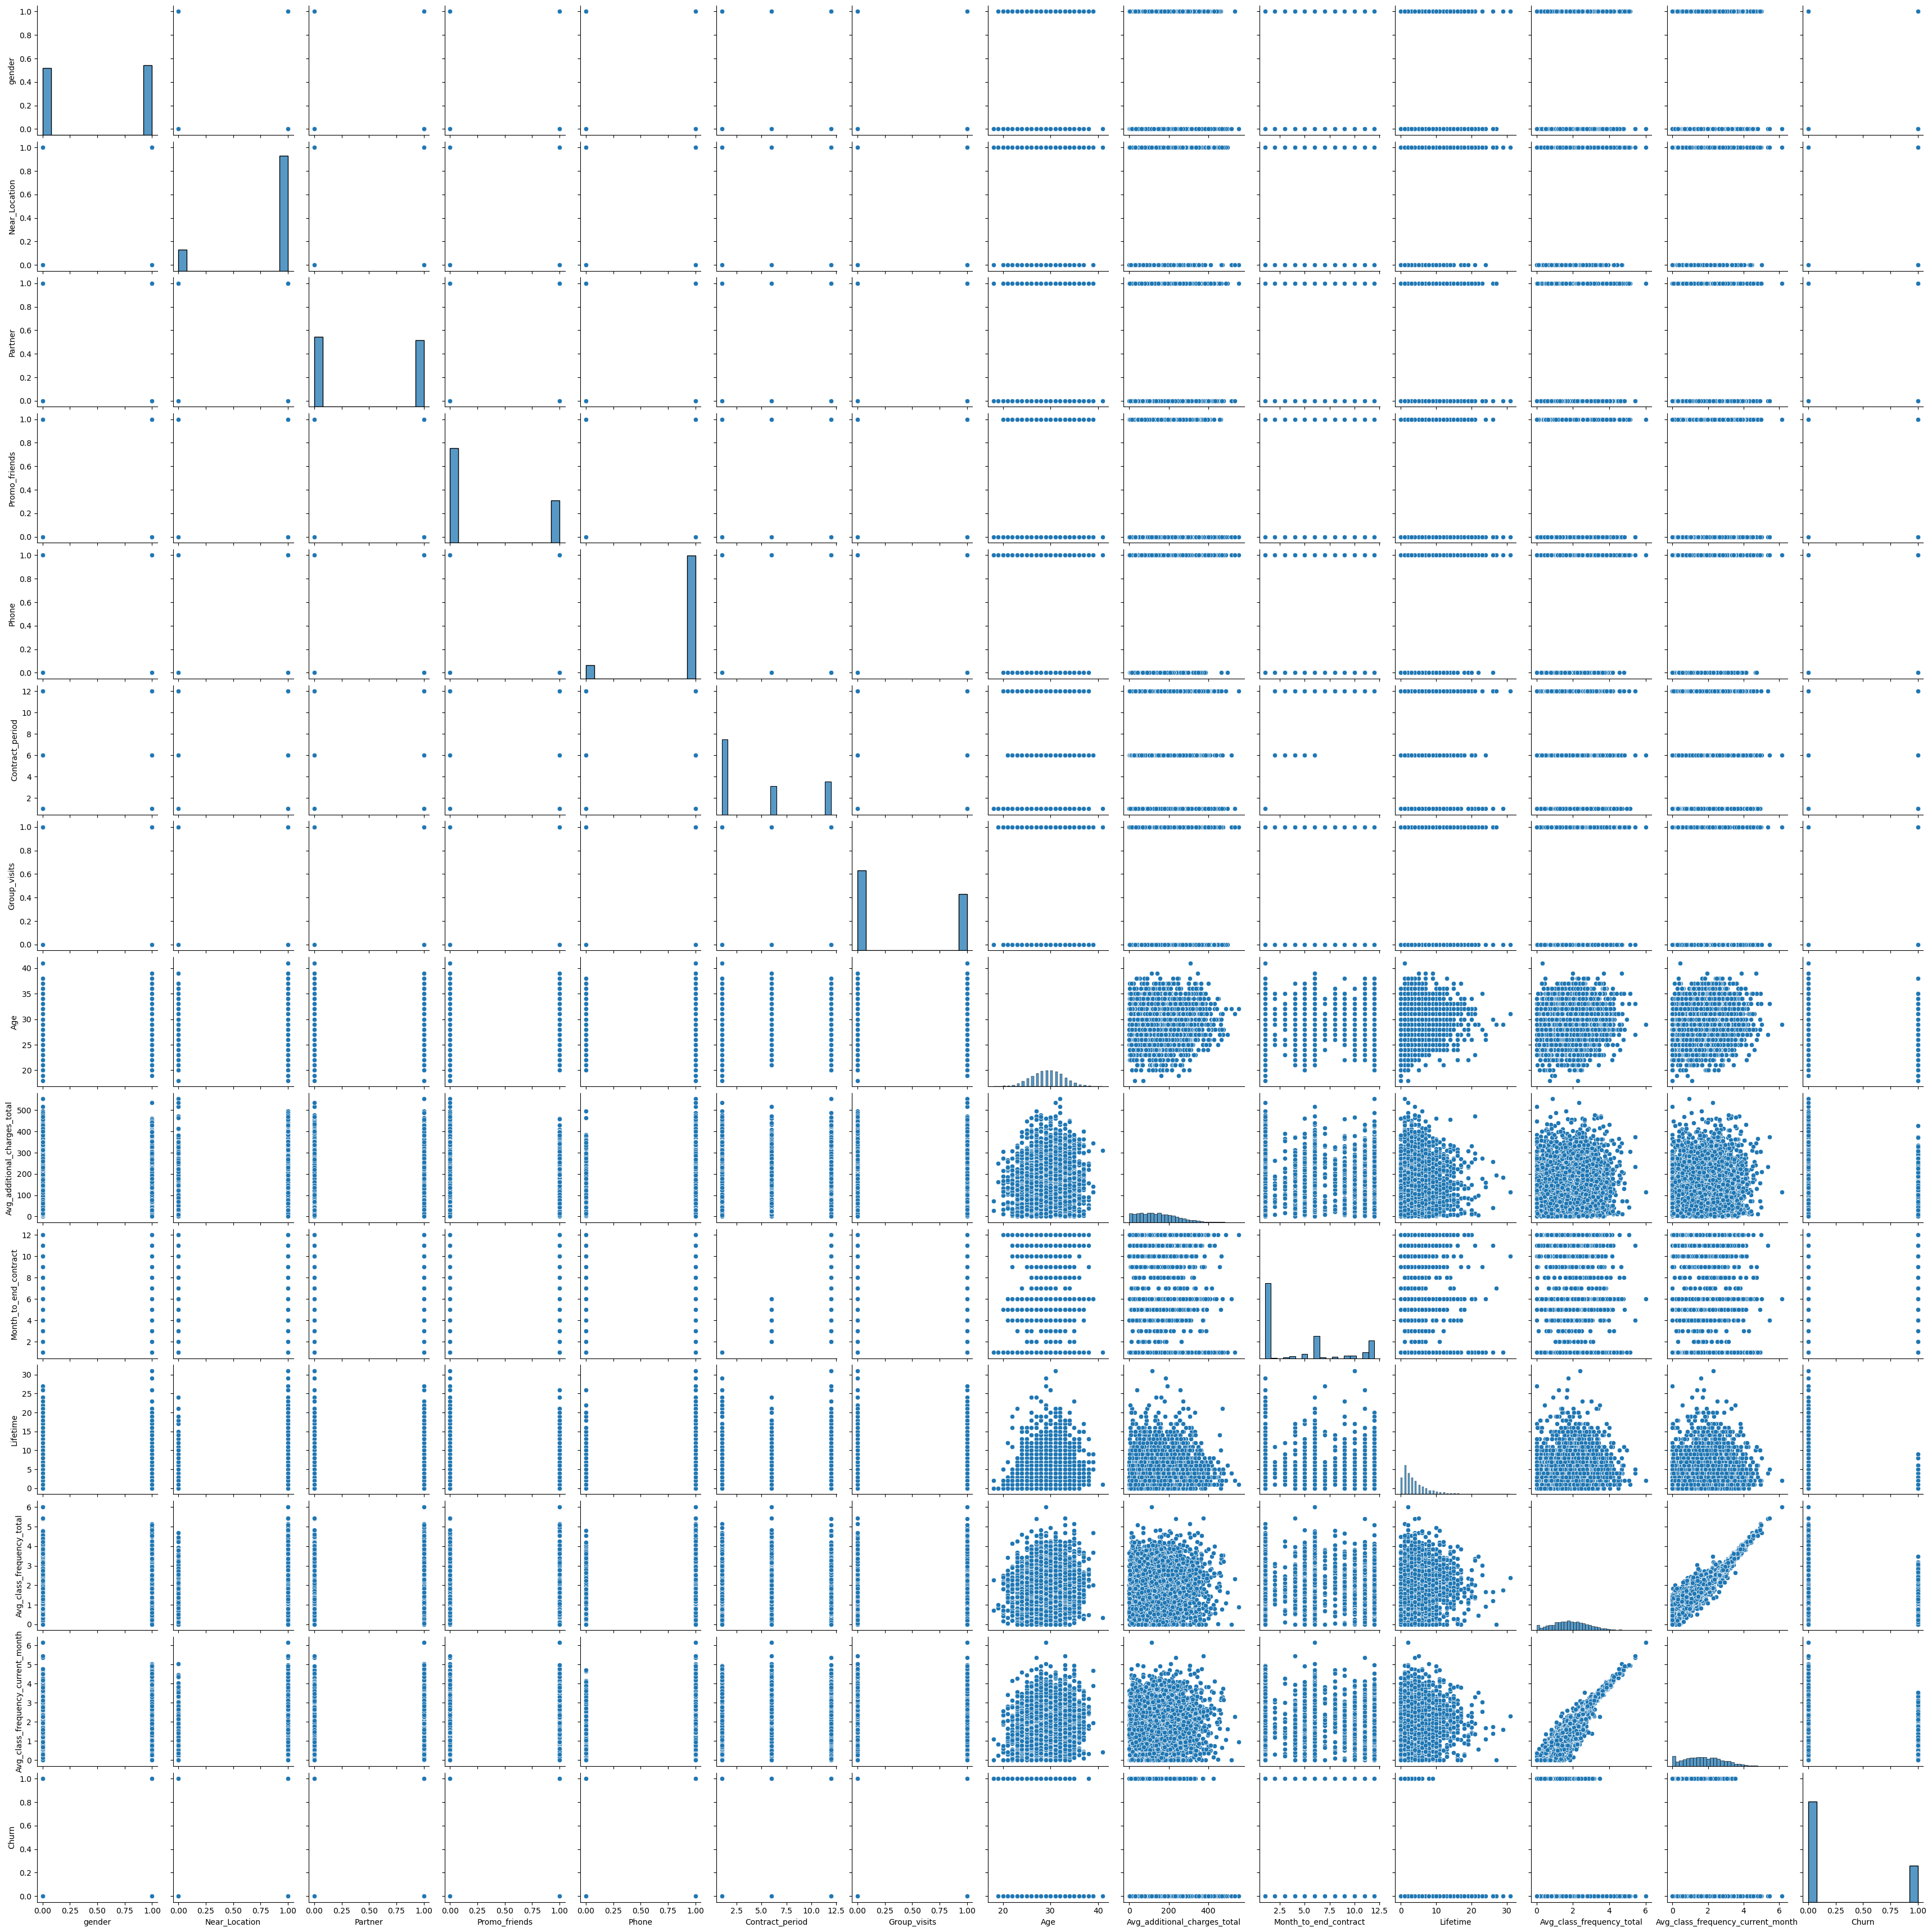

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
# 총 평균 수업 빈도 (Avg_class_frequency_total)
# 현재 월 평균 수업 빈도 (Avg_class_frequency_current_month)

# Avg_class_frequency_total | Avg_class_frequency_current_month

In [18]:
df.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


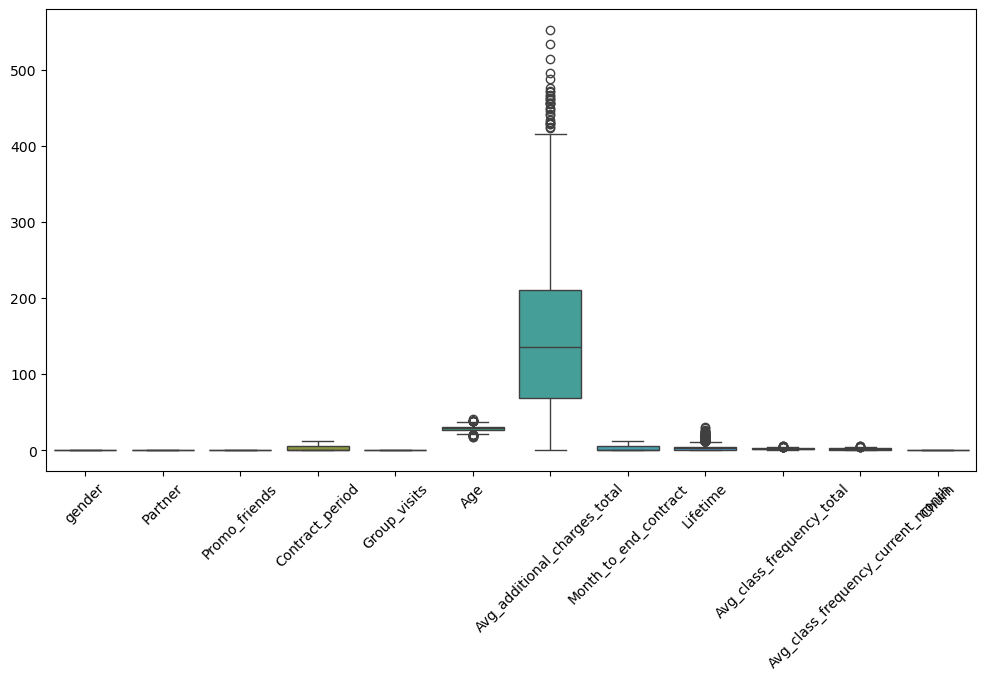

In [35]:
# Check outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

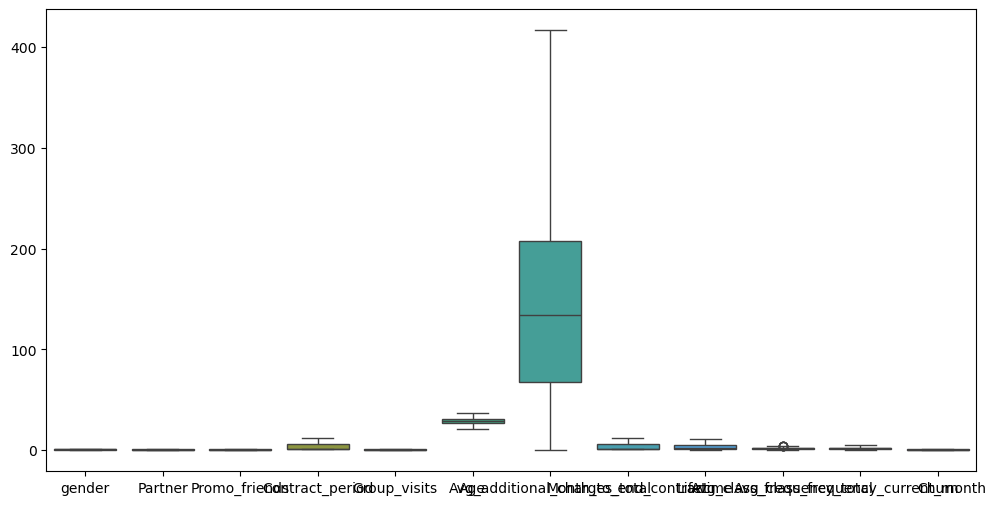

In [36]:
# Calculate IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the df to remove outliers
df= df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Verify removal of outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
# plt.xticks(rotation=45)
plt.show()

In [26]:
df.drop(["Phone", "Near_Location"], axis=1, inplace=True)

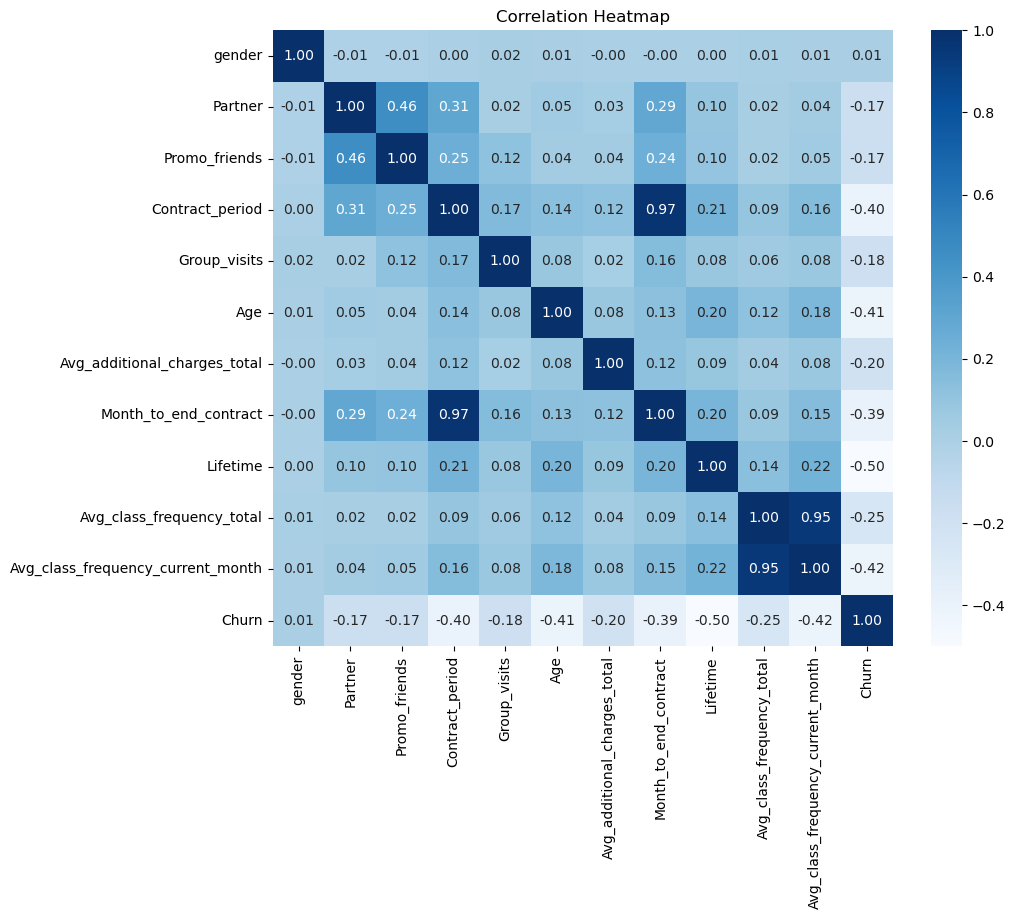

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

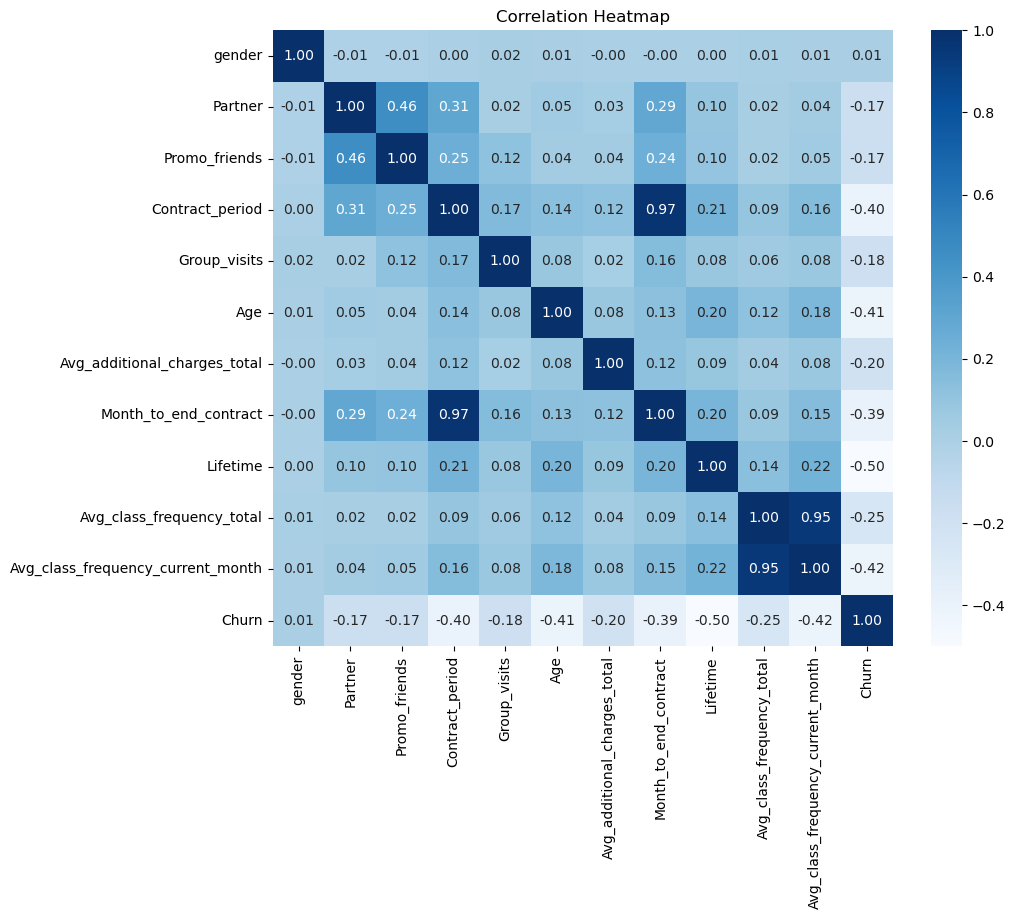

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

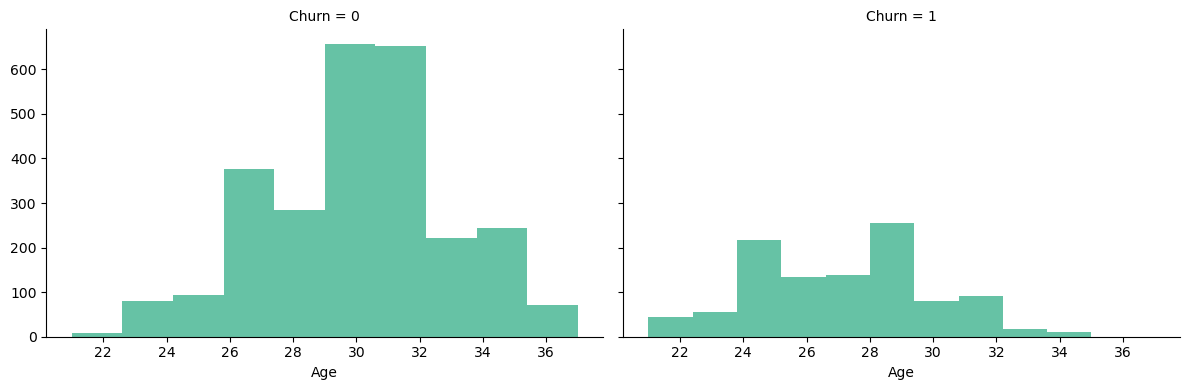

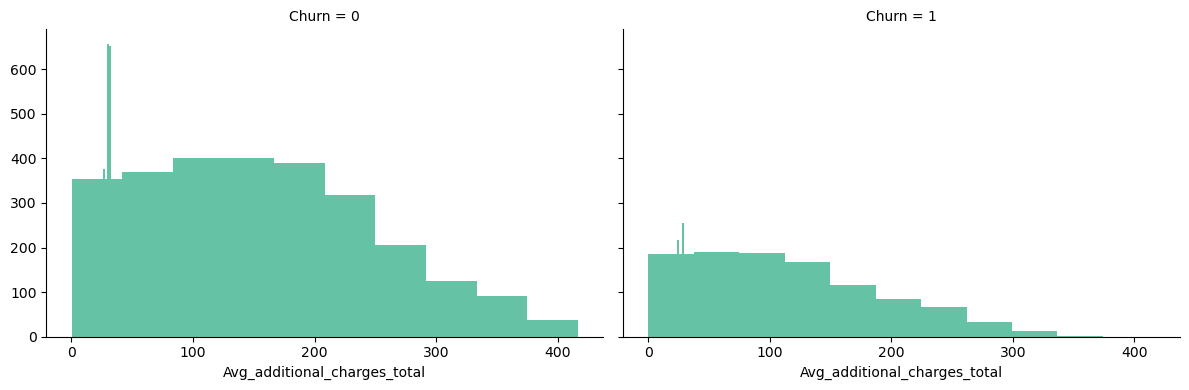

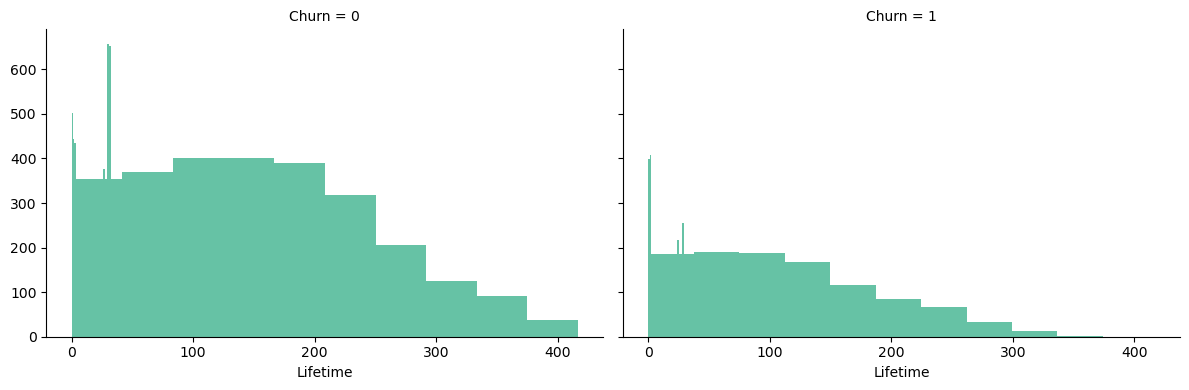

In [59]:
g = sns.FacetGrid(df, col="Churn", height=4, aspect=1.5)
g.map(plt.hist, "Age")
plt.show()

# 총 평균 추가 요금 (Avg_additional_charges_total)
g.map(plt.hist, "Avg_additional_charges_total")
plt.show()

# 가입 기간 (Lifetime) - 사용자가 체육관에 처음 등록한 이후 경과한 시간(개월 단위).
g.map(plt.hist, "Lifetime")
plt.show()

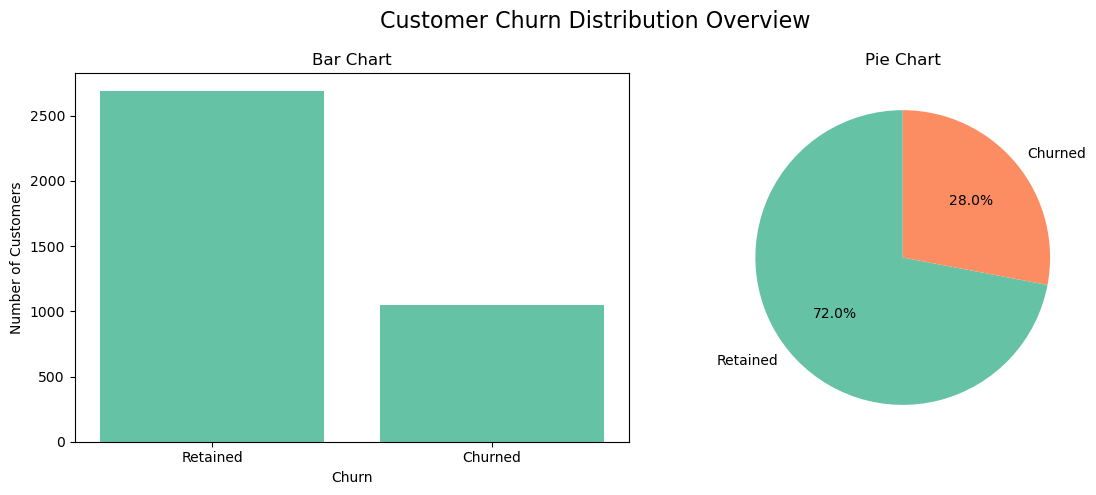

In [60]:
# Calculate churn distribution
churn_counts = df['Churn'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart
axes[0].bar(churn_counts.index, churn_counts.values)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Retained', 'Churned'])
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Bar Chart')

# Pie Chart
axes[1].pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart')

# Adjust layout
fig.suptitle('Customer Churn Distribution Overview', fontsize=16)
plt.tight_layout()
plt.show()

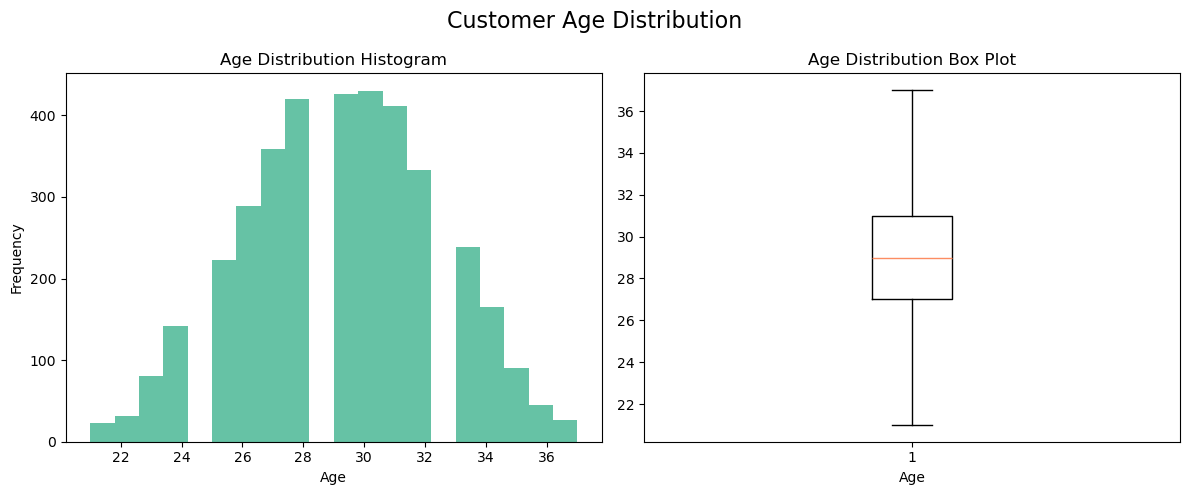

In [61]:
# Age Distribution
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
axes[0].hist(df['Age'], bins=20)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution Histogram')

# Box Plot
axes[1].boxplot(df['Age'])
axes[1].set_xlabel('Age')
axes[1].set_title('Age Distribution Box Plot')

# Adjust layout
fig.suptitle('Customer Age Distribution', fontsize=16)
plt.tight_layout()
plt.show()

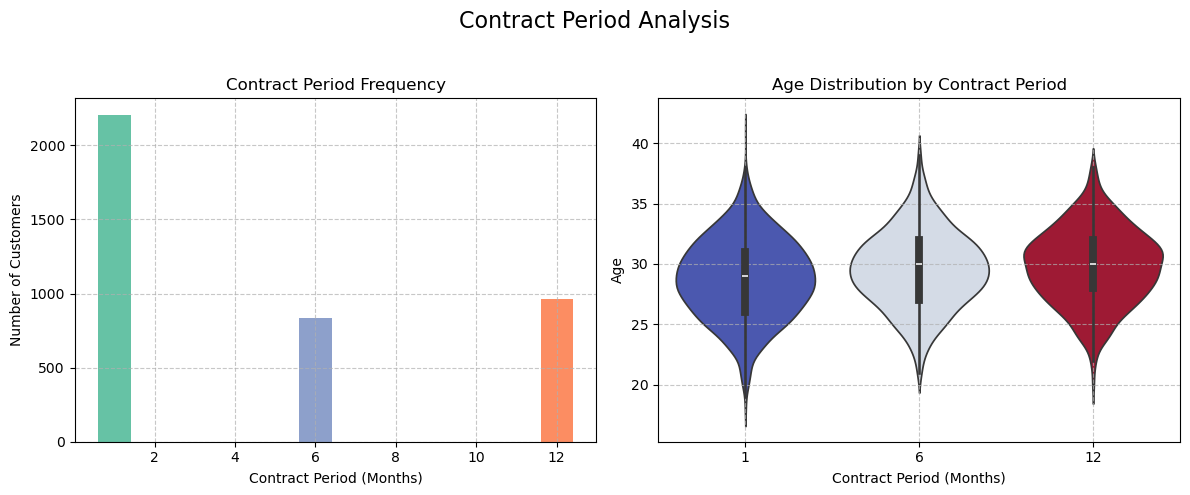

In [34]:
# Contract Period Analysis

# Bar Chart: Contract Period Frequency
contract_counts = df['Contract_period'].value_counts()

# Set color palette
sns.set_palette("Set2")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart
axes[0].bar(contract_counts.index, contract_counts.values, color=sns.color_palette("Set2"))
axes[0].set_xlabel('Contract Period (Months)')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Contract Period Frequency')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Violin Plot with hue
sns.violinplot(x='Contract_period', y='Age', data=df, ax=axes[1], hue='Contract_period', palette="coolwarm", dodge=False, legend=False)
axes[1].set_xlabel('Contract Period (Months)')
axes[1].set_ylabel('Age')
axes[1].set_title('Age Distribution by Contract Period')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout and add a main title
fig.suptitle('Contract Period Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

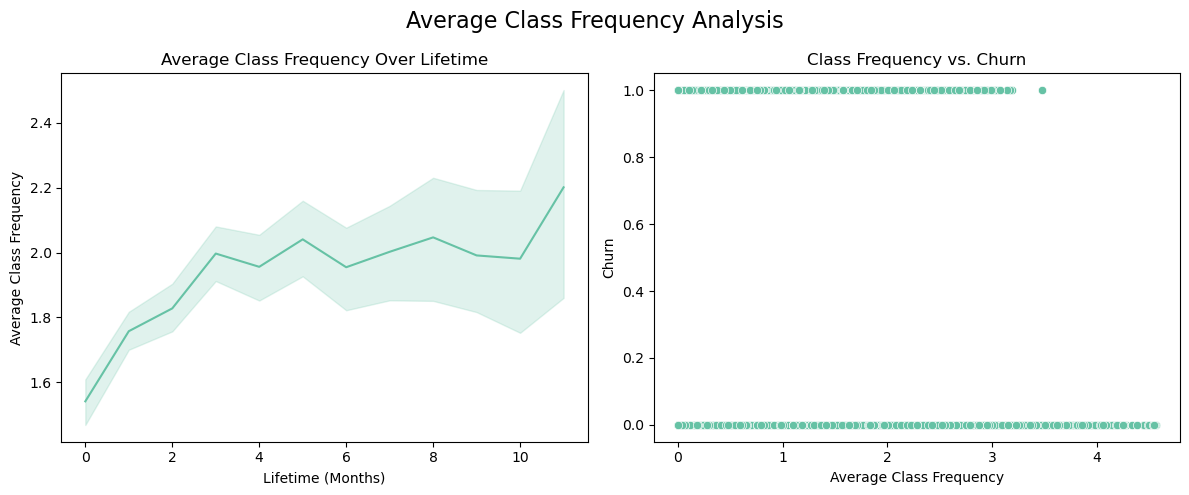

In [62]:
# Average Class Frequency Analysis

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Line Plot: Average Class Frequency over Lifetime
sns.lineplot(x='Lifetime', y='Avg_class_frequency_total', data=df, ax=axes[0])
axes[0].set_xlabel('Lifetime (Months)')
axes[0].set_ylabel('Average Class Frequency')
axes[0].set_title('Average Class Frequency Over Lifetime')

# Scatter Plot: Class Frequency vs. Churn
sns.scatterplot(x='Avg_class_frequency_total', y='Churn', data=df, ax=axes[1])
axes[1].set_xlabel('Average Class Frequency')
axes[1].set_ylabel('Churn')
axes[1].set_title('Class Frequency vs. Churn')

# Adjust layout
fig.suptitle('Average Class Frequency Analysis', fontsize=16)
plt.tight_layout()
plt.show()

In [28]:
X = df.drop(["Churn"], axis=1)
y = df['Churn']

In [30]:
X.head()

,gender,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,1,1,1,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,0,0,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,0,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Partner                            4000 non-null   int64  
 2   Promo_friends                      4000 non-null   int64  
 3   Contract_period                    4000 non-null   int64  
 4   Group_visits                       4000 non-null   int64  
 5   Age                                4000 non-null   int64  
 6   Avg_additional_charges_total       4000 non-null   float64
 7   Month_to_end_contract              4000 non-null   float64
 8   Lifetime                           4000 non-null   int64  
 9   Avg_class_frequency_total          4000 non-null   float64
 10  Avg_class_frequency_current_month  4000 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 343.9 KB


In [39]:
from sklearn.model_selection import train_test_split

In [54]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=42, train_size=0.7)

In [55]:
X_train.head()

,gender,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
3215,0,1,0,12,1,29,154.662670,12.0,2,3.023672,2.910868
3126,0,0,0,6,1,29,54.004444,6.0,4,2.048801,2.069029
697,0,1,1,12,1,28,84.028681,10.0,0,0.000000,0.000000
3613,0,1,1,1,0,30,44.314962,1.0,5,1.027640,0.947470
2374,0,1,1,12,0,32,248.424920,11.0,0,1.889913,2.025785


In [56]:
y_train.head()

3215    0
3126    0
697     0
3613    1
2374    0
Name: Churn, dtype: int64

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2800 entries, 3215 to 3174
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             2800 non-null   int64  
 1   Partner                            2800 non-null   int64  
 2   Promo_friends                      2800 non-null   int64  
 3   Contract_period                    2800 non-null   int64  
 4   Group_visits                       2800 non-null   int64  
 5   Age                                2800 non-null   int64  
 6   Avg_additional_charges_total       2800 non-null   float64
 7   Month_to_end_contract              2800 non-null   float64
 8   Lifetime                           2800 non-null   int64  
 9   Avg_class_frequency_total          2800 non-null   float64
 10  Avg_class_frequency_current_month  2800 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 262.5 KB


In [58]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 555 to 3848
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             1200 non-null   int64  
 1   Partner                            1200 non-null   int64  
 2   Promo_friends                      1200 non-null   int64  
 3   Contract_period                    1200 non-null   int64  
 4   Group_visits                       1200 non-null   int64  
 5   Age                                1200 non-null   int64  
 6   Avg_additional_charges_total       1200 non-null   float64
 7   Month_to_end_contract              1200 non-null   float64
 8   Lifetime                           1200 non-null   int64  
 9   Avg_class_frequency_total          1200 non-null   float64
 10  Avg_class_frequency_current_month  1200 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 112.5 KB
